# Laboratorium 2

Wyniki są w CSV. Każda linijka zawiera:
- typ (static/dynamic/guided)
- chunk_size
- rozmiar tablicy 
- liczbę wątków
- czas obliczeń
Zrobiłem testy dla:
- static, gdy chunk_size = 1
- dynamic, chunk_size = 1
- dynamic, chunk_size = 1000
- dynamic, chunk_size = rozmiar tablicy / liczba wątków
- guided, chunks_size = 1
Wszystko zrobione dla rozmiaru tablicy 10^6, 10^7 i 10^8, dla wątków od 1 do 4 i 10 razy każdy przypadek

wszystko się liczyło na vClustrze może jakąś minutę, więc jakby coś było nie tak z danymi albo chciałbyś inne to myślę, że można spokojnie jeszcze coś pomierzyć

### Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

### Results

In [2]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


<AxesSubplot:title={'center':'Time'}>

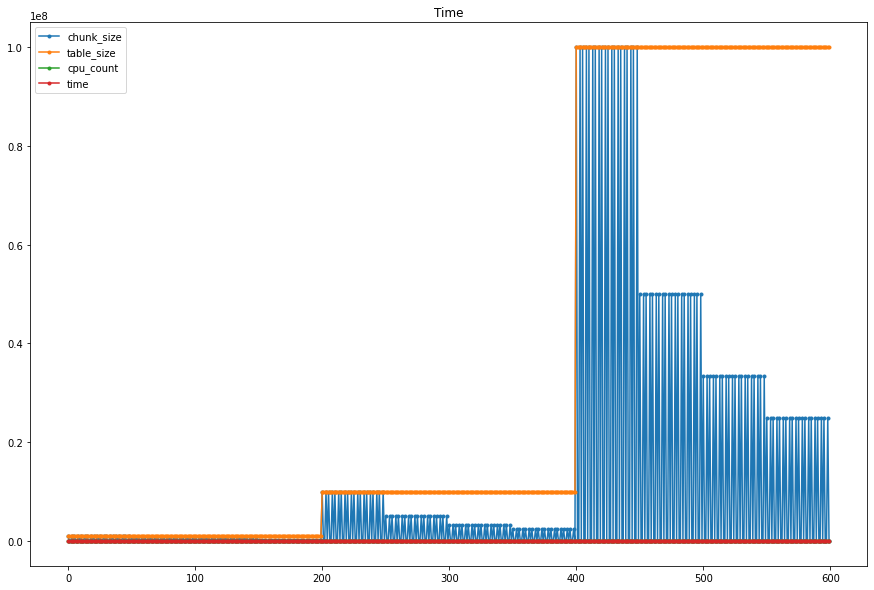

In [3]:
df.plot(figsize=(15,10), title="Time", style='.-')

In [4]:
df.sort_values(by=['type', 'chunk_size', 'cpu_count'])

,type,chunk_size,table_size,cpu_count,time
1,dynamic,1,1000000,1,0.019312
6,dynamic,1,1000000,1,0.018496
11,dynamic,1,1000000,1,0.018689
16,dynamic,1,1000000,1,0.018482
21,dynamic,1,1000000,1,0.018382
...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544
430,static,100000000,100000000,1,0.901343
435,static,100000000,100000000,1,0.902250
440,static,100000000,100000000,1,0.901541


In [5]:
df = df.sort_values(["type", "chunk_size", 'cpu_count'])
df

,type,chunk_size,table_size,cpu_count,time
1,dynamic,1,1000000,1,0.019312
6,dynamic,1,1000000,1,0.018496
11,dynamic,1,1000000,1,0.018689
16,dynamic,1,1000000,1,0.018482
21,dynamic,1,1000000,1,0.018382
...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544
430,static,100000000,100000000,1,0.901343
435,static,100000000,100000000,1,0.902250
440,static,100000000,100000000,1,0.901541


In [6]:
df.set_index(["type", "chunk_size", 'cpu_count'])

table_size      time
type    chunk_size cpu_count                      
dynamic 1          1             1000000  0.019312
                   1             1000000  0.018496
                   1             1000000  0.018689
                   1             1000000  0.018482
                   1             1000000  0.018382
...                                  ...       ...
static  100000000  1           100000000  0.902544
                   1           100000000  0.901343
                   1           100000000  0.902250
                   1           100000000  0.901541
                   1           100000000  0.903406

[600 rows x 2 columns]

In [7]:
df['case_id'] = (list(range(1,11)) *  int(df.shape[0] // 10))
df

,type,chunk_size,table_size,cpu_count,time,case_id
1,dynamic,1,1000000,1,0.019312,1
6,dynamic,1,1000000,1,0.018496,2
11,dynamic,1,1000000,1,0.018689,3
16,dynamic,1,1000000,1,0.018482,4
21,dynamic,1,1000000,1,0.018382,5
...,...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544,6
430,static,100000000,100000000,1,0.901343,7
435,static,100000000,100000000,1,0.902250,8
440,static,100000000,100000000,1,0.901541,9


In [8]:
pv = df.pivot(index=['cpu_count', 'case_id', 'type', 'chunk_size'], columns=['table_size'], values='time')
pv

table_size                            1000000    10000000   100000000
cpu_count case_id type    chunk_size                                 
1         1       dynamic 1            0.019312   0.180981   1.801262
                          1000         0.009710   0.091437   0.903737
                          1000000      0.009638        NaN        NaN
                          10000000          NaN   0.092194        NaN
                          100000000         NaN        NaN   0.905115
...                                         ...        ...        ...
4         10      dynamic 25000000          NaN        NaN   0.200010
                  guided  1            0.002640   0.020158   0.198548
                  static  250000       0.002812        NaN        NaN
                          2500000           NaN   0.020576        NaN
                          25000000          NaN        NaN   0.199405

[360 rows x 3 columns]

<AxesSubplot:xlabel='cpu_count,case_id,type,chunk_size'>

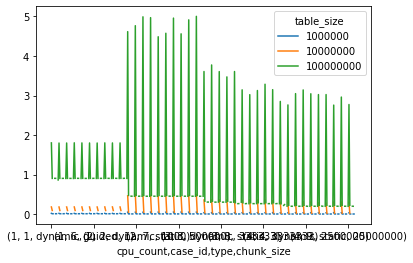

In [9]:
pv.plot()

In [10]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


In [11]:
ag = df.groupby(['type','chunk_size', 'table_size', 'cpu_count']).mean()
ag

time
type    chunk_size table_size cpu_count          
dynamic 1          1000000    1          0.018542
                              2          0.049664
                              3          0.036345
                              4          0.034805
                   10000000   1          0.180750
                              2          0.479038
                              3          0.352999
                              4          0.296994
                   100000000  1          1.800648
                              2          4.783896
                              3          3.378900
                              4          2.938436
        1000       1000000    1          0.009657
                              2          0.005308
                              3          0.003620
                              4          0.002861
                   10000000   1          0.091367
                              2          0.047852
                              3          0.033300
                              4          0.022919
                   100000000  1          0.904378
                              2          0.472698
                              3          0.303136
                              4          0.227418
        250000     1000000    4          0.002864
        333333     1000000    3          0.003646
        500000     1000000    2          0.005234
        1000000    1000000    1          0.009656
        2500000    10000000   4          0.020628
        3333333    10000000   3          0.031025
        5000000    10000000   2          0.046041
        10000000   10000000   1          0.091349
        25000000   100000000  4          0.202176
        33333333   100000000  3          0.280133
        50000000   100000000  2          0.452993
        100000000  100000000  1          0.904511
guided  1          1000000    1          0.009728
                              2          0.004977
                              3          0.003497
                              4          0.002723
                   10000000   1          0.091344
                              2          0.045933
                              3          0.030800
                              4          0.020383
                   100000000  1          0.904639
                              2          0.452664
                              3          0.280867
                              4          0.202973
static  250000     1000000    4          0.002800
        333333     1000000    3          0.003649
        500000     1000000    2          0.005143
        1000000    1000000    1          0.009799
        2500000    10000000   4          0.020806
        3333333    10000000   3          0.030829
        5000000    10000000   2          0.045902
        10000000   10000000   1          0.090883
        25000000   100000000  4          0.200549
        33333333   100000000  3          0.283427
        50000000   100000000  2          0.451493
        100000000  100000000  1          0.898122

<AxesSubplot:title={'center':'Time'}, xlabel='cpu_count'>

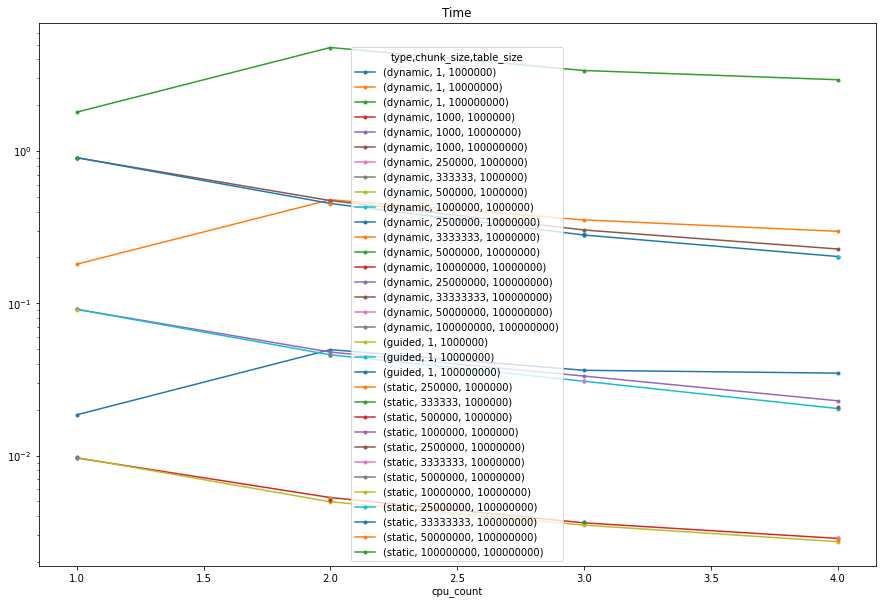

In [12]:
ag.reset_index().pivot(index='cpu_count', values='time', columns=['type','chunk_size','table_size']).plot(logy=True,figsize=(15,10), title="Time", style='.-')

In [13]:
df = pd.read_csv('./results.csv')
df

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


In [108]:
def get_type(name, drop=True):
    x = df[df.type==name]
    if drop:
        x = x.drop(columns=['type'])
    return x

In [15]:
guided = get_type('guided')
guided

,chunk_size,table_size,cpu_count,time
4,1,1000000,1,0.009603
9,1,1000000,1,0.009661
14,1,1000000,1,0.009614
19,1,1000000,1,0.009610
24,1,1000000,1,0.009622
...,...,...,...,...
579,1,100000000,4,0.198776
584,1,100000000,4,0.199137
589,1,100000000,4,0.198985
594,1,100000000,4,0.198977


In [16]:
static = get_type('static')
static

,chunk_size,table_size,cpu_count,time
0,1000000,1000000,1,0.009775
5,1000000,1000000,1,0.010476
10,1000000,1000000,1,0.009608
15,1000000,1000000,1,0.009576
20,1000000,1000000,1,0.009598
...,...,...,...,...
575,25000000,100000000,4,0.200759
580,25000000,100000000,4,0.198140
585,25000000,100000000,4,0.199925
590,25000000,100000000,4,0.198017


In [17]:
dynamic = get_type('dynamic')
dynamic

,chunk_size,table_size,cpu_count,time
1,1,1000000,1,0.019312
2,1000,1000000,1,0.009710
3,1000000,1000000,1,0.009638
6,1,1000000,1,0.018496
7,1000,1000000,1,0.009643
...,...,...,...,...
592,1000,100000000,4,0.224468
593,25000000,100000000,4,0.199222
596,1,100000000,4,2.772308
597,1000,100000000,4,0.223689


<AxesSubplot:title={'center':'Time (s): Guided Scheduling (all measurements)'}, xlabel='cpu_count'>

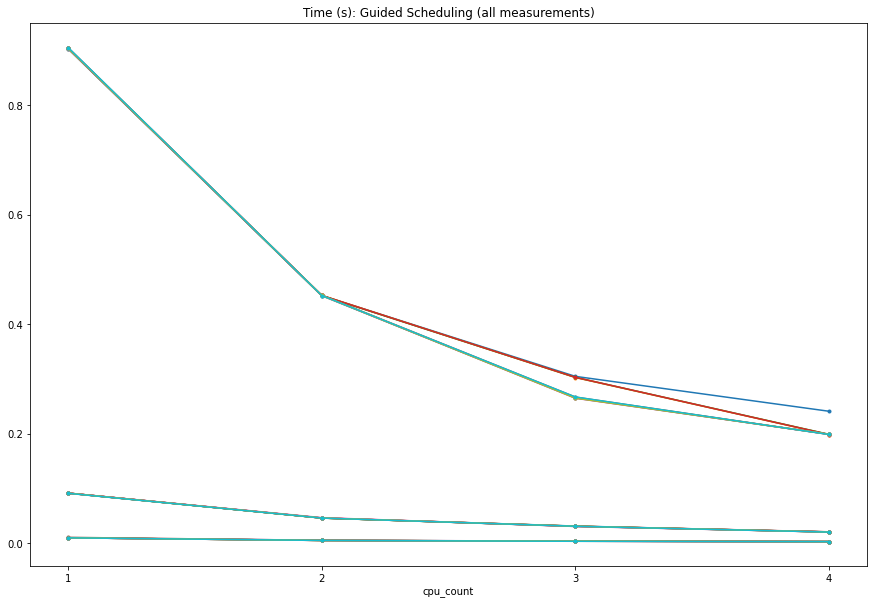

In [64]:
gall = guided.copy()

gall['case_id'] = (list(range(1,11)) *  int(gall.shape[0] // 10))

gall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=False,figsize=(15,10), title="Time (s): Guided Scheduling (all measurements)", style='.-', xticks=range(1,5), legend=False)

<AxesSubplot:title={'center':'Time (log(s)): Guided Scheduling (all measurements)'}, xlabel='cpu_count'>

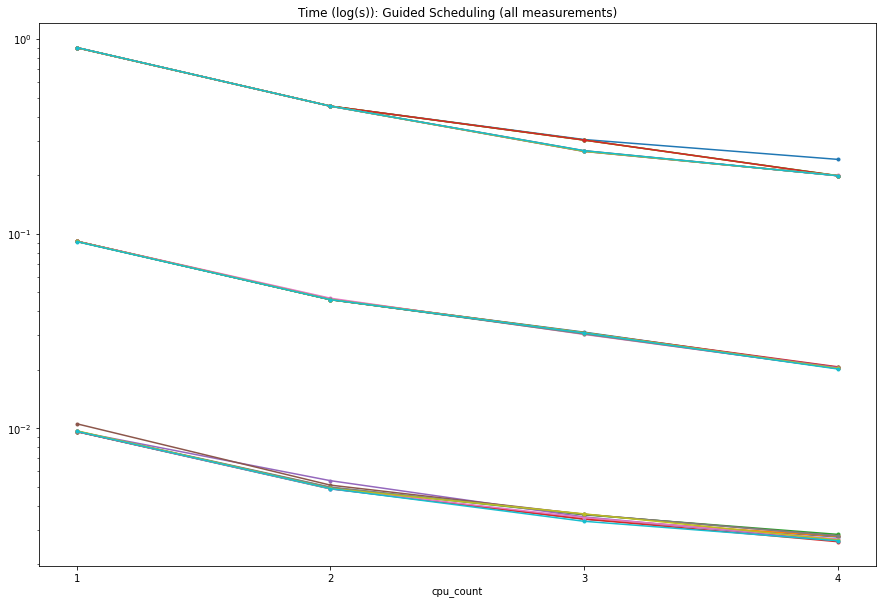

In [67]:
gall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=True,figsize=(15,10), title="Time (log(s)): Guided Scheduling (all measurements)", style='.-', xticks=range(1,5), legend=False)

<AxesSubplot:title={'center':'Time (s): Guided Scheduling (mean of measurements)'}, xlabel='cpu_count'>

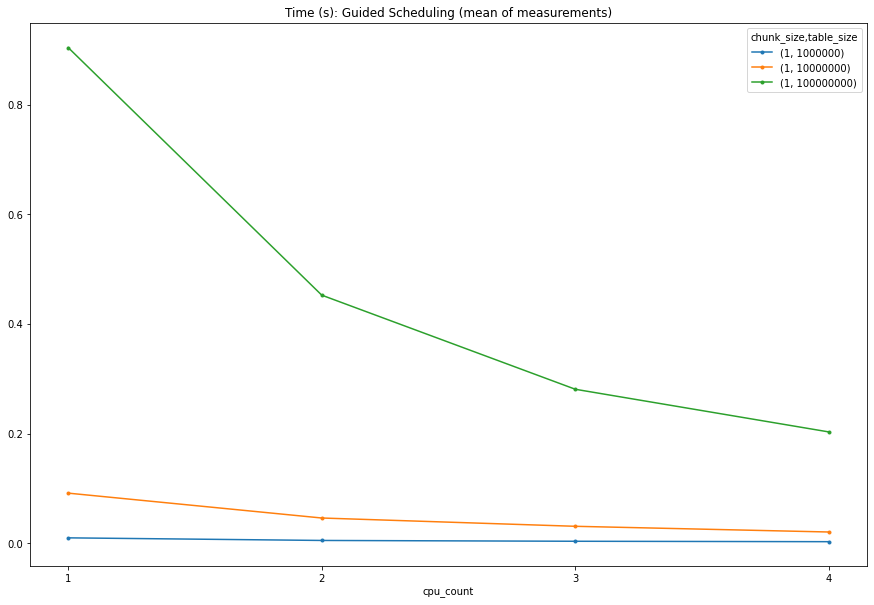

In [69]:
guided.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=False,figsize=(15,10), title="Time (s): Guided Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (log(s)): Guided Scheduling (mean of measurements)'}, xlabel='cpu_count'>

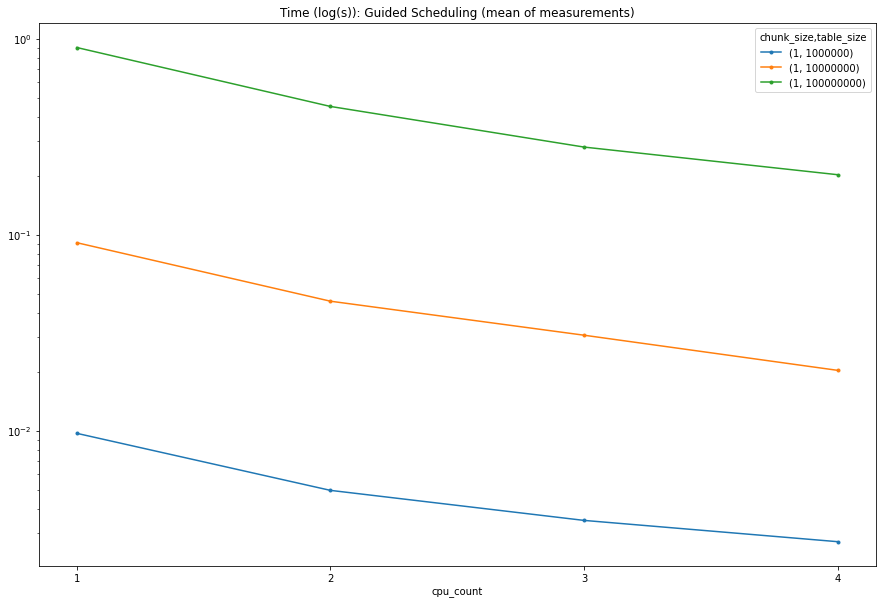

In [70]:
guided.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (log(s)): Guided Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

In [71]:
dall = dynamic.copy()

dall['case_id'] = (list(range(1,11)) *  int(dall.shape[0] // 10))

In [7]:
def set_case_id(df): 
#     dall = df.copy()
    dall['case_id'] = (list(range(1,11)) *  int(dall.shape[0] // 10))
    return dall
    
def overwrite_variable_chunk(df):
    a = df.copy()
    a.loc[a.chunk_size == a.table_size // a.cpu_count, 'chunk_size'] = 'table_size / cpu_count'
    return a

In [131]:
dall = set_case_id(dynamic)
dall = overwrite_variable_chunk(dall)
dall

,type,chunk_size,table_size,cpu_count,time,case_id
1,dynamic,1,1000000,1,0.019312,1
2,dynamic,1000,1000000,1,0.009710,2
3,dynamic,table_size / cpu_count,1000000,1,0.009638,3
6,dynamic,1,1000000,1,0.018496,4
7,dynamic,1000,1000000,1,0.009643,5
...,...,...,...,...,...,...
592,dynamic,1000,100000000,4,0.224468,6
593,dynamic,table_size / cpu_count,100000000,4,0.199222,7
596,dynamic,1,100000000,4,2.772308,8
597,dynamic,1000,100000000,4,0.223689,9


<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling (all measurements)'}, xlabel='cpu_count'>

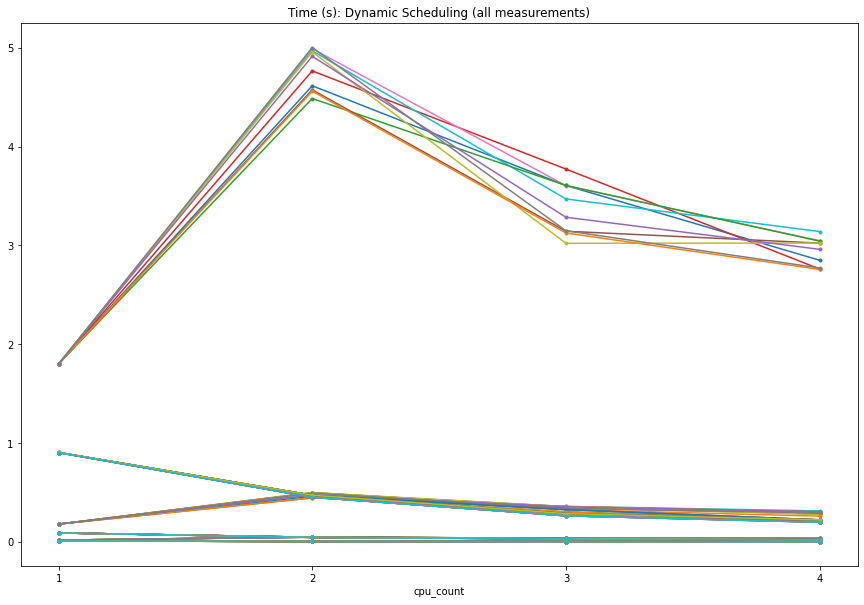

In [132]:
dall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=False, legend=False,figsize=(15,10), title="Time (s): Dynamic Scheduling (all measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (log(s)): Dynamic Scheduling (all measurements)'}, xlabel='cpu_count'>

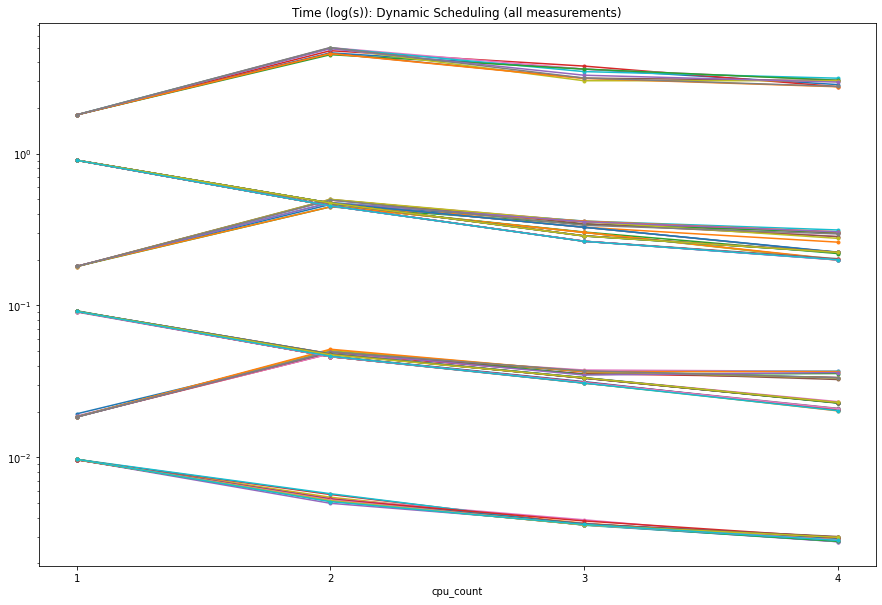

In [133]:
dall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=True, legend=False,figsize=(15,10), title="Time (log(s)): Dynamic Scheduling (all measurements)", style='.-', xticks=range(1,5))

In [134]:
dmean = overwrite_variable_chunk(dynamic)

<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling (mean of measurements)'}, xlabel='cpu_count'>

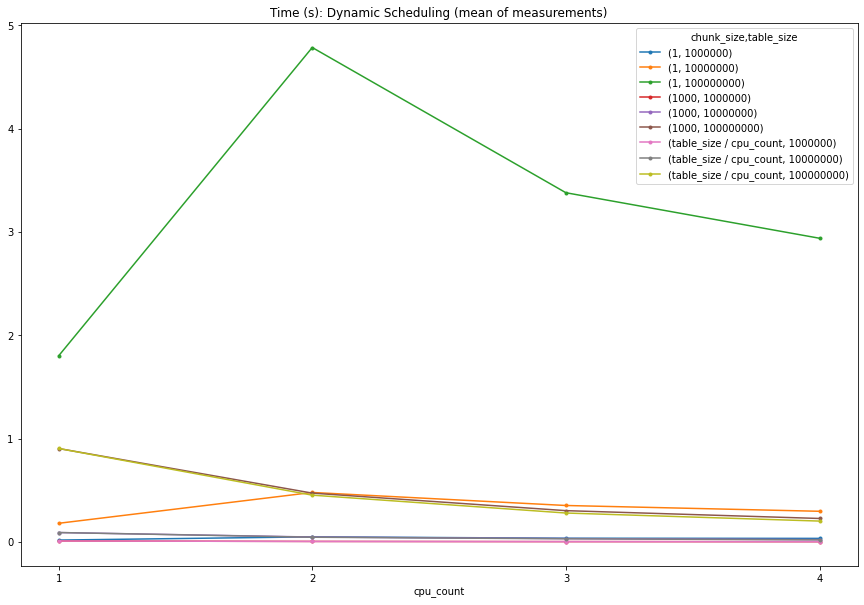

In [135]:
dmean.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=False,figsize=(15,10), title="Time (s): Dynamic Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

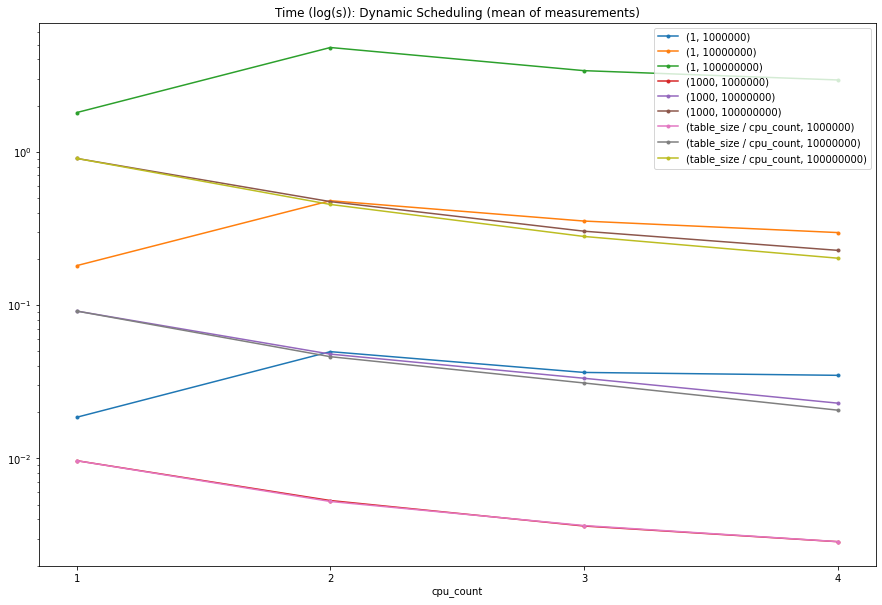

In [136]:
dmean.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (log(s)): Dynamic Scheduling (mean of measurements)", style='.-', xticks=range(1,5))\
.legend(loc='upper right')

In [137]:
a = dynamic.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \

# a[a.chunk_size == a.table_size // a.cpu_count].chunk_size = 1/3
# a[a.chunk_size == a.table_size // a.cpu_count].chunk_size = 1/3

a.loc[a.chunk_size == a.table_size // a.cpu_count, 'chunk_size'] = 'table_size / cpu_count'
a

# .pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) \
# .plot(logy=True,figsize=(15,10), title="Time (s): Dynamic Scheduling", style='.-', xticks=range(1,5))

,chunk_size,table_size,cpu_count,index,time
0,1,1000000,1,23.5,0.018542
1,1,1000000,2,73.5,0.049664
2,1,1000000,3,123.5,0.036345
3,1,1000000,4,173.5,0.034805
4,1,10000000,1,223.5,0.180750
5,1,10000000,2,273.5,0.479038
6,1,10000000,3,323.5,0.352999
7,1,10000000,4,373.5,0.296994
8,1,100000000,1,423.5,1.800648
9,1,100000000,2,473.5,4.783896


In [138]:
color_dict = {'table_size / cpu_count': '#D9534F', 1000: '#6DD588', 1: '#FB2FCC'}

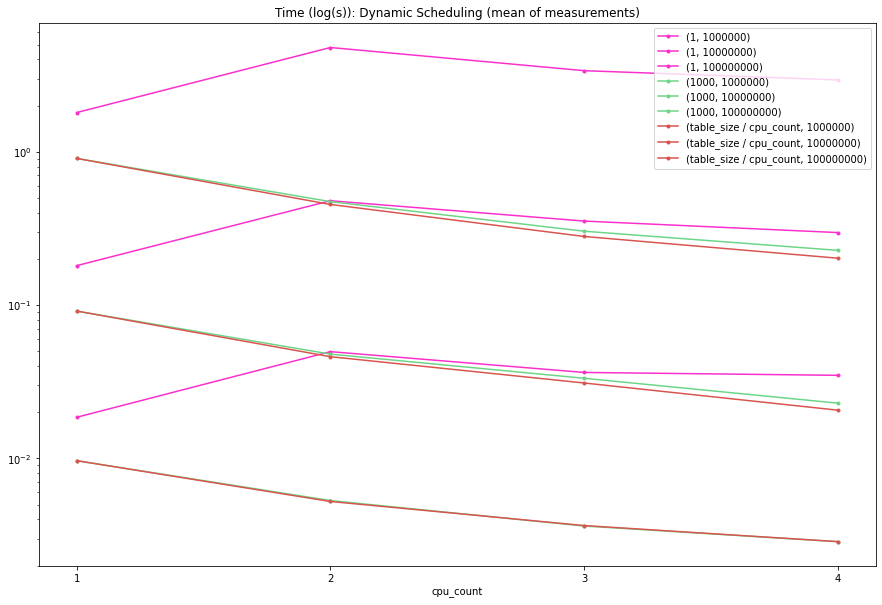

In [139]:
b = dmean.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) 

b.plot(logy=True,figsize=(15,10), 
       title="Time (log(s)): Dynamic Scheduling (mean of measurements)", 
       style='.-', xticks=range(1,5),
      color=[color_dict.get(x[0], '#333333') for x in b.columns]
      )\
.legend(loc='upper right')

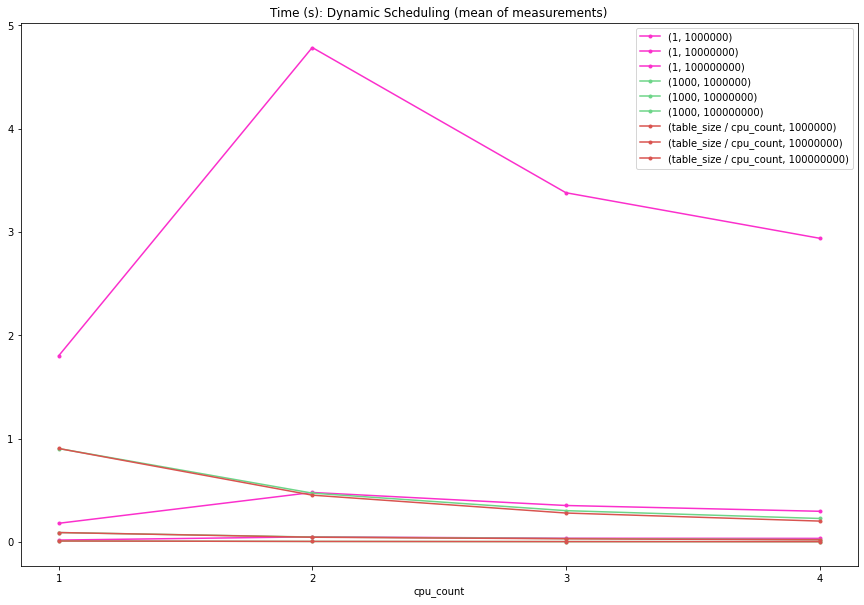

In [140]:
b = dmean.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size']) 

b.plot(logy=False,figsize=(15,10), 
       title="Time (s): Dynamic Scheduling (mean of measurements)", 
       style='.-', xticks=range(1,5),
      color=[color_dict.get(x[0], '#333333') for x in b.columns]
      )\
.legend(loc='upper right')

<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling (all measurements)'}, xlabel='cpu_count'>

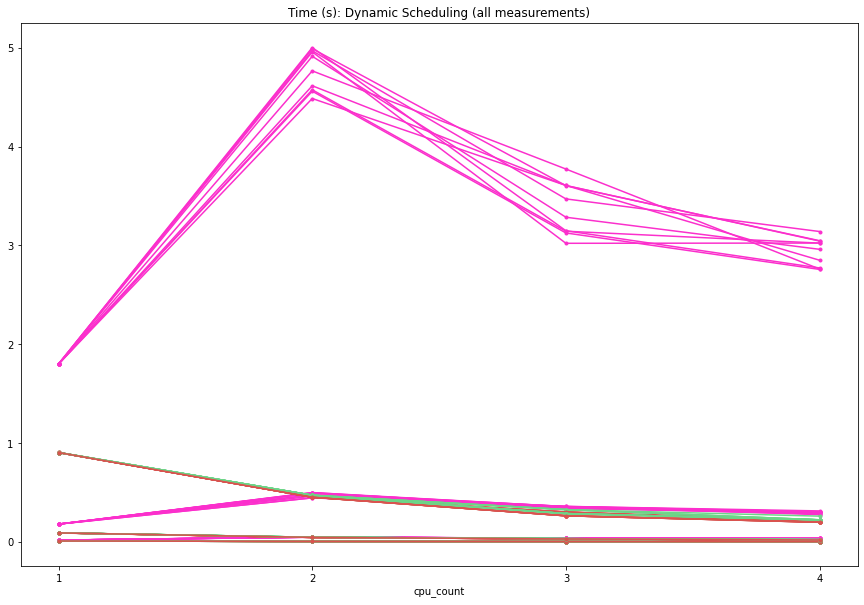

In [141]:
b = dall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) 

b.plot(
    logy=False, 
    legend=False,figsize=(15,10), 
    title="Time (s): Dynamic Scheduling (all measurements)", style='.-', xticks=range(1,5)
    , color = [color_dict.get(x[0], '#333333') for x in b.columns]
)

<AxesSubplot:title={'center':'Time (s): Dynamic Scheduling'}, xlabel='cpu_count'>

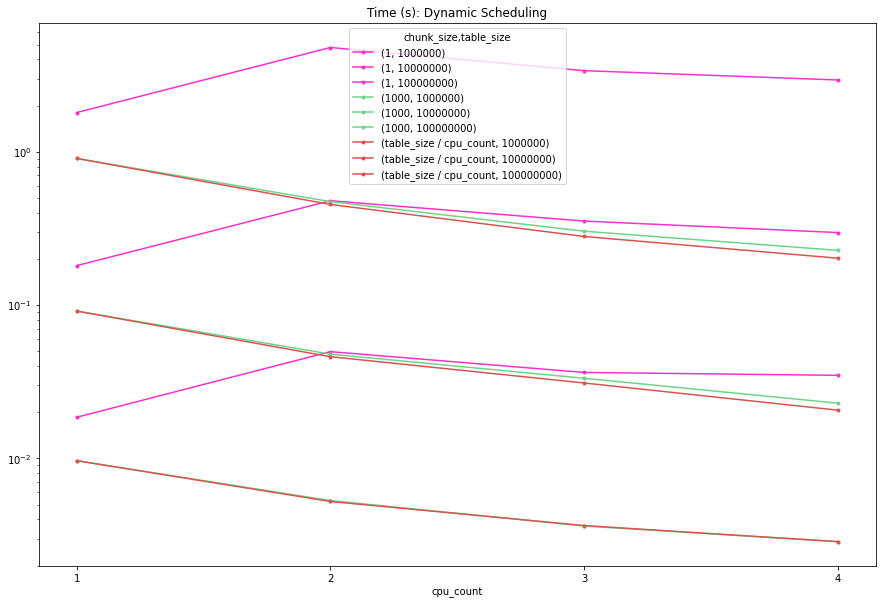

In [142]:
b = a.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size'])

b.plot(logy=True,figsize=(15,10), title="Time (s): Dynamic Scheduling", style='.-', xticks=range(
    1,5),
      color=[color_dict.get(x[0], '#333333') for x in b.columns])

In [143]:
static

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
5,static,1000000,1000000,1,0.010476
10,static,1000000,1000000,1,0.009608
15,static,1000000,1000000,1,0.009576
20,static,1000000,1000000,1,0.009598
...,...,...,...,...,...
575,static,25000000,100000000,4,0.200759
580,static,25000000,100000000,4,0.198140
585,static,25000000,100000000,4,0.199925
590,static,25000000,100000000,4,0.198017


In [144]:
static.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index()

,chunk_size,table_size,cpu_count,index,time
0,250000,1000000,4,172.5,0.002800
1,333333,1000000,3,122.5,0.003649
2,500000,1000000,2,72.5,0.005143
3,1000000,1000000,1,22.5,0.009799
4,2500000,10000000,4,372.5,0.020806
5,3333333,10000000,3,322.5,0.030829
6,5000000,10000000,2,272.5,0.045902
7,10000000,10000000,1,222.5,0.090883
8,25000000,100000000,4,572.5,0.200549
9,33333333,100000000,3,522.5,0.283427


In [145]:
sall = set_case_id(static)
sall

,type,chunk_size,table_size,cpu_count,time,case_id
0,static,1000000,1000000,1,0.009775,1
5,static,1000000,1000000,1,0.010476,2
10,static,1000000,1000000,1,0.009608,3
15,static,1000000,1000000,1,0.009576,4
20,static,1000000,1000000,1,0.009598,5
...,...,...,...,...,...,...
575,static,25000000,100000000,4,0.200759,6
580,static,25000000,100000000,4,0.198140,7
585,static,25000000,100000000,4,0.199925,8
590,static,25000000,100000000,4,0.198017,9


<AxesSubplot:title={'center':'Time (s): Static Scheduling (all measurements)'}, xlabel='cpu_count'>

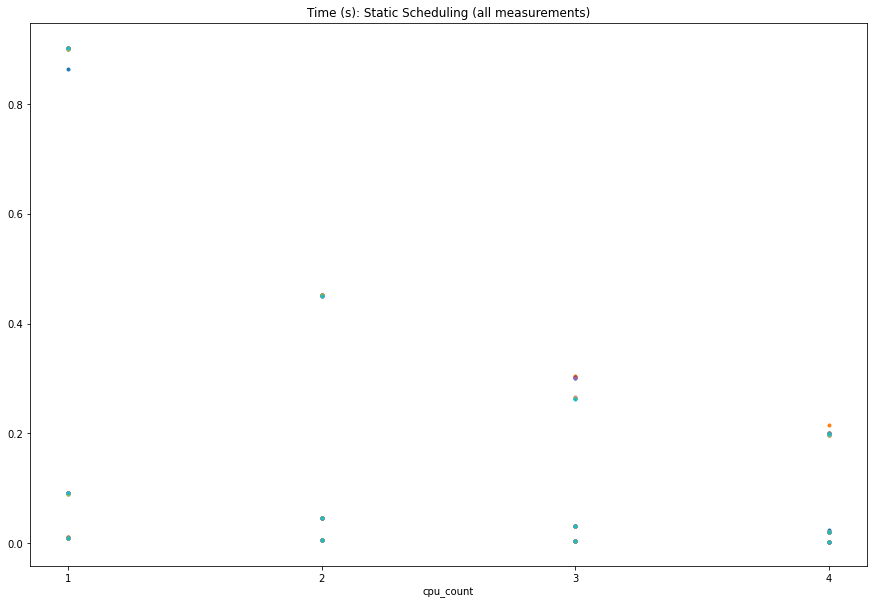

In [146]:
sall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=False, legend=False,figsize=(15,10), title="Time (s): Static Scheduling (all measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (log(s)): Static Scheduling (all measurements)'}, xlabel='cpu_count'>

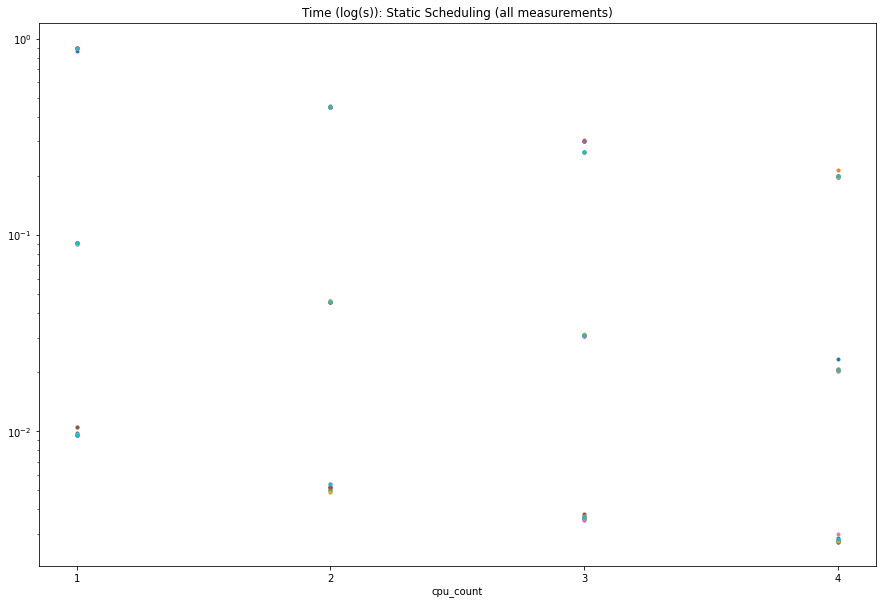

In [147]:
sall.reset_index() \
.pivot(index='cpu_count', values='time', columns=['chunk_size','table_size', 'case_id']) \
.plot(logy=True, legend=False,figsize=(15,10), title="Time (log(s)): Static Scheduling (all measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (s): Static Scheduling (mean of measurements)'}, xlabel='cpu_count'>

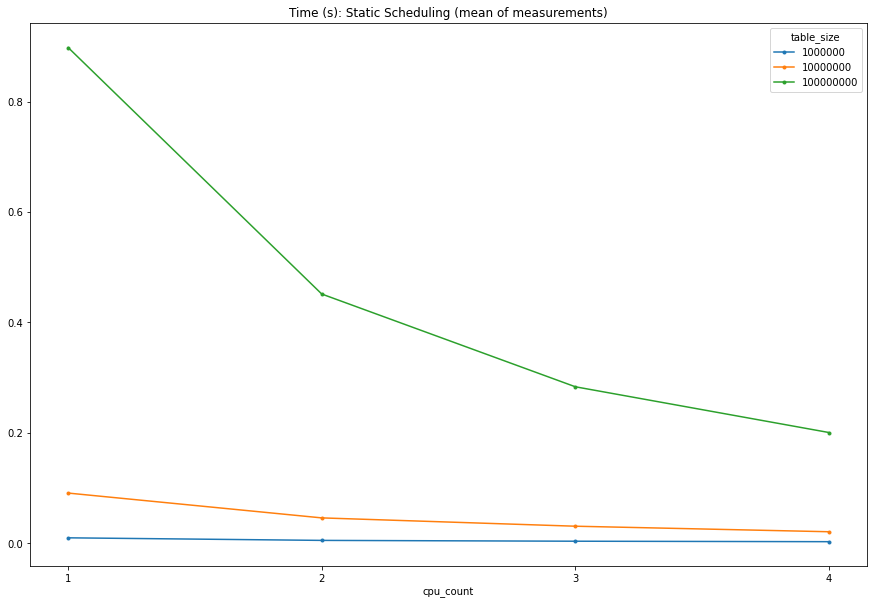

In [148]:
static.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index().drop(columns=['chunk_size']) \
.pivot(index='cpu_count', values='time', columns=['table_size']) \
.plot(logy=False,figsize=(15,10), title="Time (s): Static Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (log(s)): Static Scheduling (mean of measurements)'}, xlabel='cpu_count'>

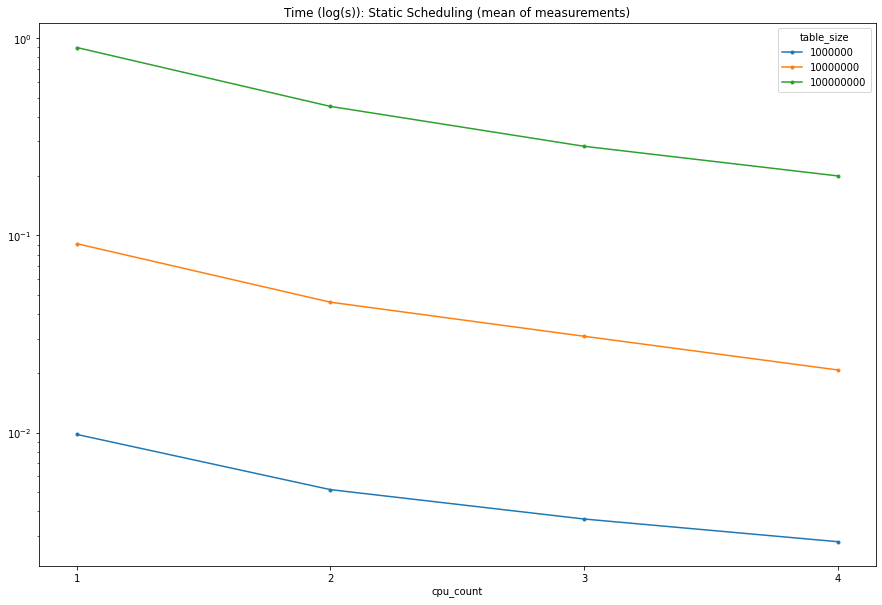

In [149]:
static.reset_index() \
.groupby(['chunk_size', 'table_size', 'cpu_count']).mean().reset_index().drop(columns=['chunk_size']) \
.pivot(index='cpu_count', values='time', columns=['table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (log(s)): Static Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

In [179]:
dfall = pd.read_csv('./results.csv')
dfall

,type,chunk_size,table_size,cpu_count,time
0,static,1000000,1000000,1,0.009775
1,dynamic,1,1000000,1,0.019312
2,dynamic,1000,1000000,1,0.009710
3,dynamic,1000000,1000000,1,0.009638
4,guided,1,1000000,1,0.009603
...,...,...,...,...,...
595,static,25000000,100000000,4,0.199405
596,dynamic,1,100000000,4,2.772308
597,dynamic,1000,100000000,4,0.223689
598,dynamic,25000000,100000000,4,0.200010


In [151]:
dfall = set_case_id(dfall)
dfall = overwrite_variable_chunk(dfall)
dfall

,type,chunk_size,table_size,cpu_count,time,case_id
0,static,table_size / cpu_count,1000000,1,0.009775,1
1,dynamic,1,1000000,1,0.019312,2
2,dynamic,1000,1000000,1,0.009710,3
3,dynamic,table_size / cpu_count,1000000,1,0.009638,4
4,guided,1,1000000,1,0.009603,5
...,...,...,...,...,...,...
595,static,table_size / cpu_count,100000000,4,0.199405,6
596,dynamic,1,100000000,4,2.772308,7
597,dynamic,1000,100000000,4,0.223689,8
598,dynamic,table_size / cpu_count,100000000,4,0.200010,9


<AxesSubplot:title={'center':'Time (s): Scheduling (mean of measurements)'}, xlabel='cpu_count'>

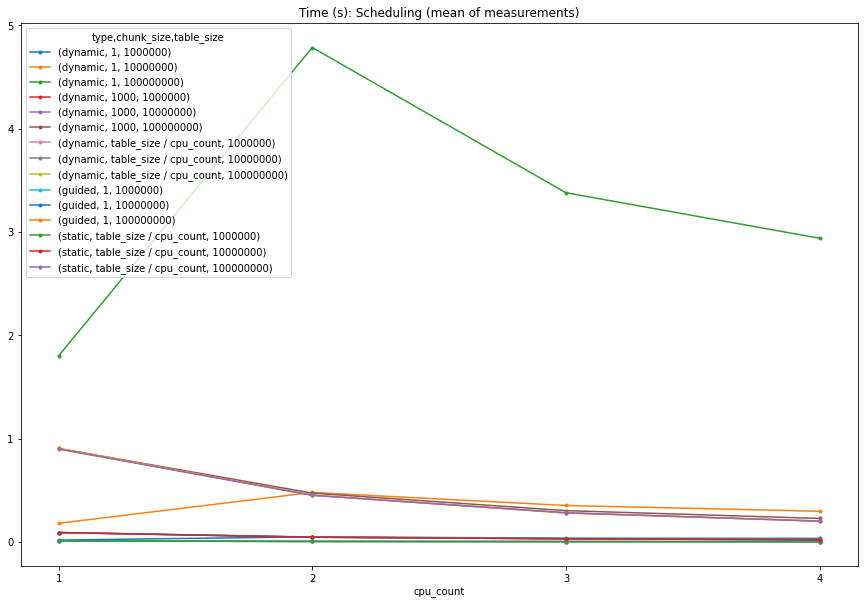

In [152]:
dfall.reset_index() \
.groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) \
.plot(logy=False,figsize=(15,10), title="Time (s): Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

<AxesSubplot:title={'center':'Time (s): Scheduling (mean of measurements)'}, xlabel='cpu_count'>

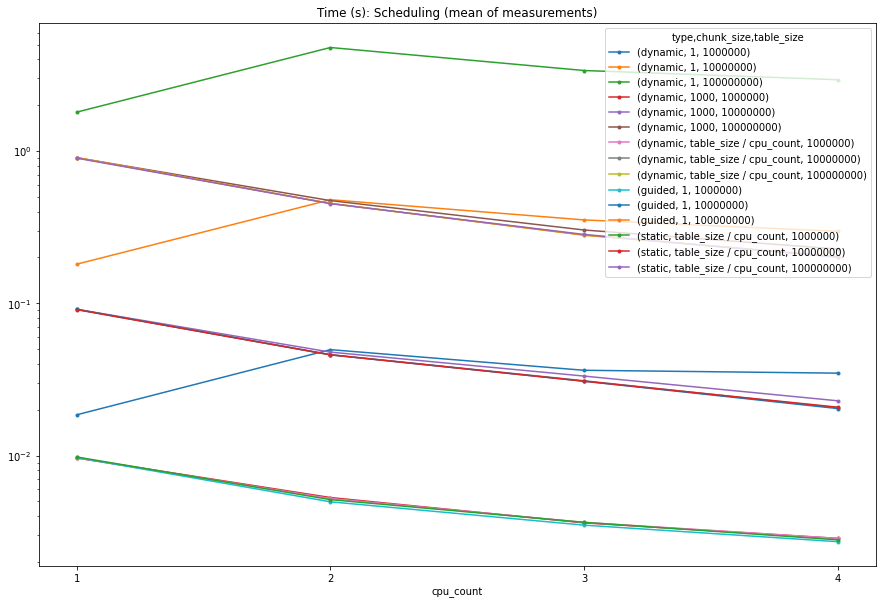

In [153]:
dfall.reset_index() \
.groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) \
.plot(logy=True,figsize=(15,10), title="Time (s): Scheduling (mean of measurements)", style='.-', xticks=range(1,5))

In [266]:
dfall = pd.read_csv('./results.csv')
dfall = overwrite_variable_chunk(dfall)

In [267]:
color_dict = {
    'dynamic': '#D9534F', 'static': '#6DD588', 'guided': '#2c03fc',
    10 ** 6: '#D9534F', 10**7: '#6DD588', 10 **8: '#2c03fc',
    1: '#D9534F', 1000: '#6DD588', 'table_size / cpu_count': '#2c03fc',
             }

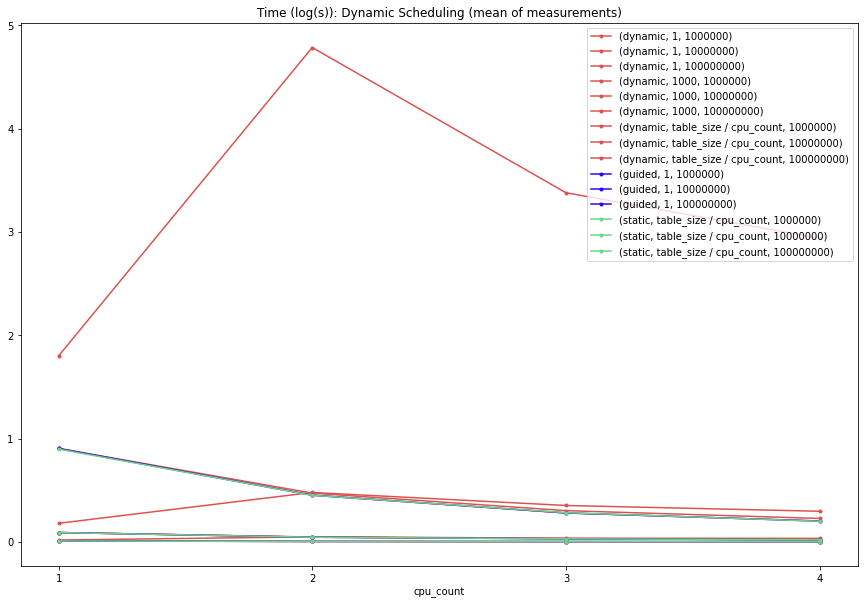

In [271]:
b = dfall.reset_index() \
.groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) \

b.plot(logy=False,figsize=(15,10), 
       title="Time (log(s)): Dynamic Scheduling (mean of measurements)", 
       style='.-', xticks=range(1,5),
      color=[color_dict.get(x[0], '#333333') for x in b.columns]
      )\
.legend(loc='upper right')

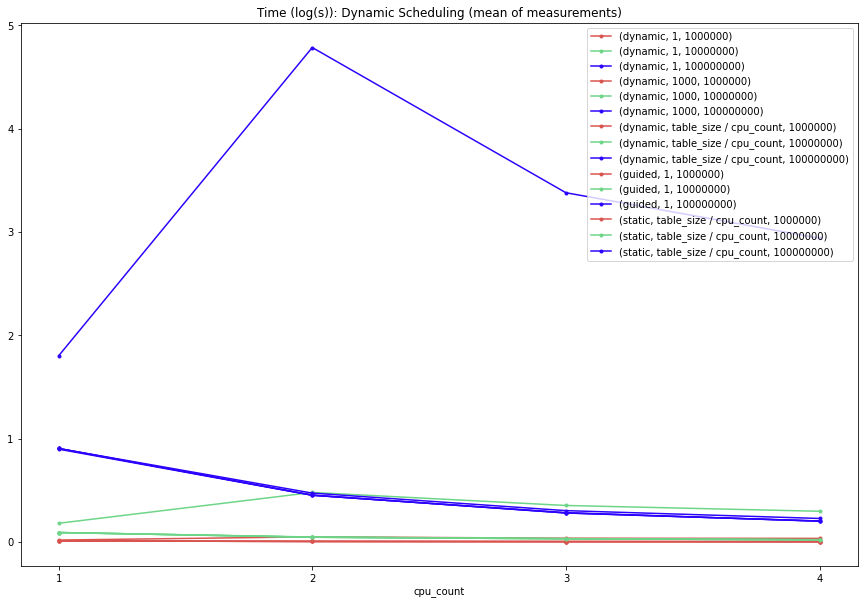

In [272]:
b = dfall.reset_index() \
.groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) \

b.plot(logy=False,figsize=(15,10), 
       title="Time (log(s)): Dynamic Scheduling (mean of measurements)", 
       style='.-', xticks=range(1,5),
      color=[color_dict.get(x[2], '#333333') for x in b.columns]
      )\
.legend(loc='upper right')

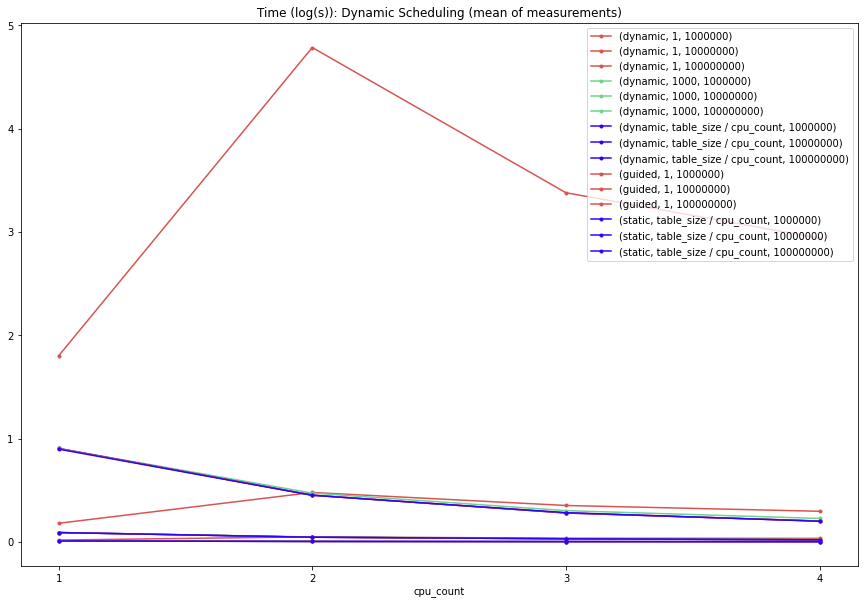

In [273]:
b = dfall.reset_index() \
.groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
.pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) \

b.plot(logy=False,figsize=(15,10), 
       title="Time (log(s)): Dynamic Scheduling (mean of measurements)", 
       style='.-', xticks=range(1,5),
      color=[color_dict.get(x[1], '#333333') for x in b.columns]
      )\
.legend(loc='upper right')

In [259]:
dfall = pd.read_csv('./results.csv')

In [260]:
dfall =dfall.sort_values(i)
dfall['case_id'] = (list(range(1,dfall.shape[0]+1)))
dfall

,type,chunk_size,table_size,cpu_count,time,case_id
1,dynamic,1,1000000,1,0.019312,1
6,dynamic,1,1000000,1,0.018496,2
11,dynamic,1,1000000,1,0.018689,3
16,dynamic,1,1000000,1,0.018482,4
21,dynamic,1,1000000,1,0.018382,5
...,...,...,...,...,...,...
425,static,100000000,100000000,1,0.902544,596
430,static,100000000,100000000,1,0.901343,597
435,static,100000000,100000000,1,0.902250,598
440,static,100000000,100000000,1,0.901541,599


In [200]:
dfall = overwrite_variable_chunk(dfall)

In [239]:
def plot_dfall(dfall, color=True, log=False):
    b = dfall.reset_index() \
    .groupby(['type', 'chunk_size', 'table_size', 'cpu_count']).mean().reset_index() \
    .pivot(index='cpu_count', values='time', columns=['type', 'chunk_size','table_size']) 

    b.plot(logy=log,figsize=(15,10), 
           title="Time (s): (mean of measurements)", 
           style='.-', xticks=range(1,5),
          color=[color_dict.get(x[0], '#333333') for x in b.columns] if color else None
          )\
    .legend(loc='upper right')

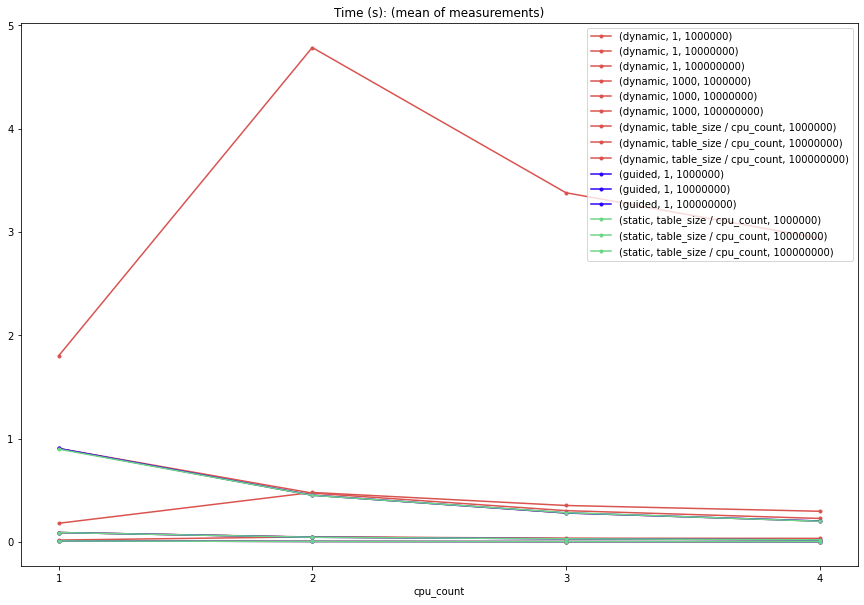

In [240]:
plot_dfall(dfall, True, False)

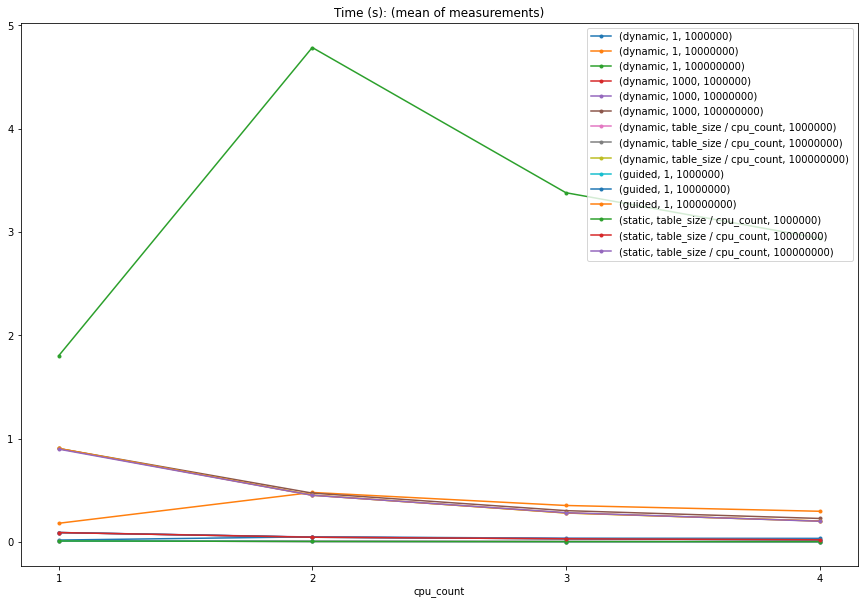

In [241]:
plot_dfall(dfall, False, False)

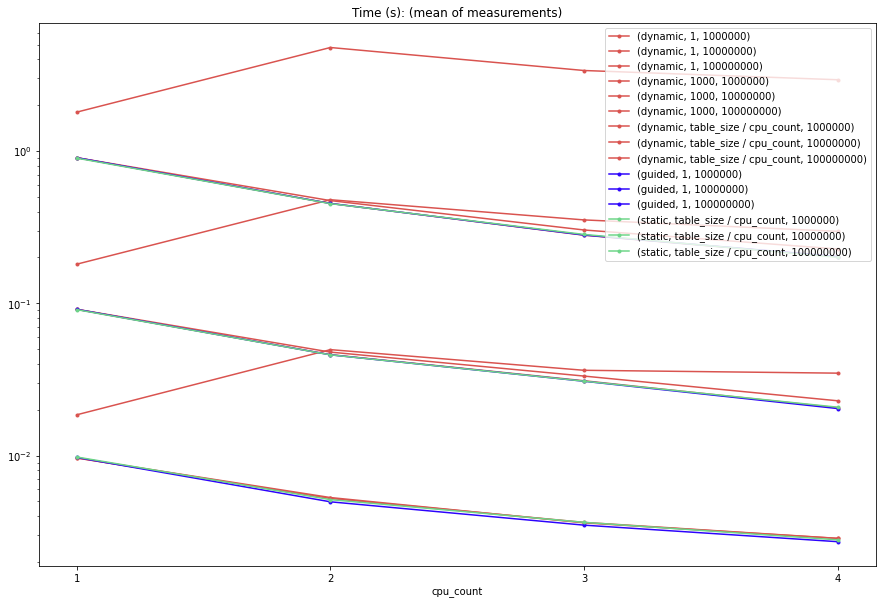

In [242]:
plot_dfall(dfall, True, True)

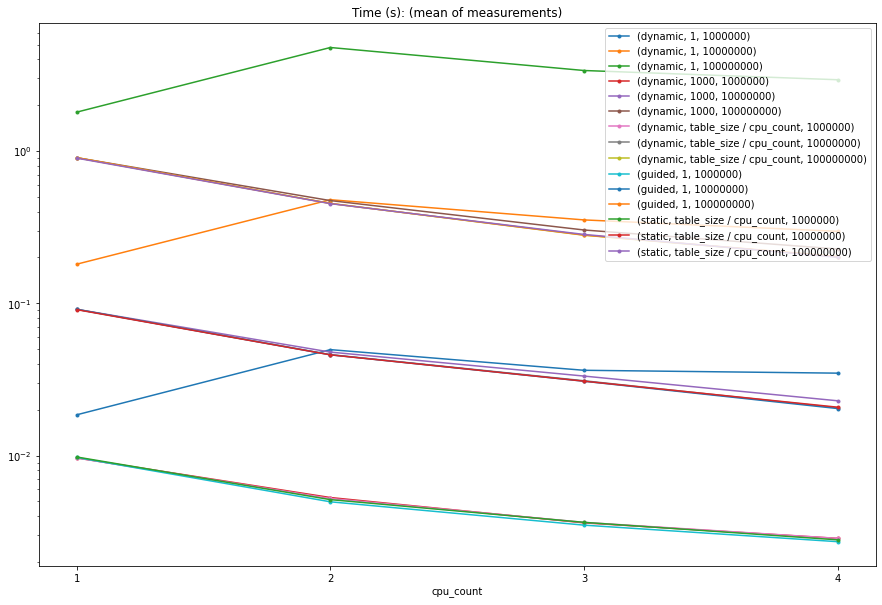

In [243]:
plot_dfall(dfall, False, True)

In [298]:
def get_size(df, size, drop=True):
    x = df[df.table_size==size]
    if drop:
        x = x.drop(columns=['table_size'])
    return x

In [299]:
dfall = pd.read_csv('./results.csv')

In [300]:
d6 = get_size(dfall, 10. ** 6, drop=False)
d6 = overwrite_variable_chunk(d6)
d6 = d6.drop(columns=['table_size'])
d6

,type,chunk_size,cpu_count,time
0,static,table_size / cpu_count,1,0.009775
1,dynamic,1,1,0.019312
2,dynamic,1000,1,0.009710
3,dynamic,table_size / cpu_count,1,0.009638
4,guided,1,1,0.009603
...,...,...,...,...
195,static,table_size / cpu_count,4,0.002812
196,dynamic,1,4,0.033358
197,dynamic,1000,4,0.002968
198,dynamic,table_size / cpu_count,4,0.002831


In [304]:
d7 = get_size(dfall, 10. ** 7, False)
d7 = overwrite_variable_chunk(d7)
d7 = d7.drop(columns=['table_size'])
d7

,type,chunk_size,cpu_count,time
200,static,table_size / cpu_count,1,0.091134
201,dynamic,1,1,0.180981
202,dynamic,1000,1,0.091437
203,dynamic,table_size / cpu_count,1,0.092194
204,guided,1,1,0.091291
...,...,...,...,...
395,static,table_size / cpu_count,4,0.020576
396,dynamic,1,4,0.295890
397,dynamic,1000,4,0.022971
398,dynamic,table_size / cpu_count,4,0.020289


In [305]:
d8 = get_size(dfall, 10. ** 8, False)
d8 = overwrite_variable_chunk(d8)
d8 = d8.drop(columns=['table_size'])
d8

,type,chunk_size,cpu_count,time
400,static,table_size / cpu_count,1,0.863822
401,dynamic,1,1,1.801262
402,dynamic,1000,1,0.903737
403,dynamic,table_size / cpu_count,1,0.905115
404,guided,1,1,0.904481
...,...,...,...,...
595,static,table_size / cpu_count,4,0.199405
596,dynamic,1,4,2.772308
597,dynamic,1000,4,0.223689
598,dynamic,table_size / cpu_count,4,0.200010


In [331]:
def plot_dfall(dfall, color=False, log=False, title=''):
    b = dfall.reset_index() \
    .groupby(['type', 'chunk_size', 'cpu_count']).mean().reset_index() \
    .pivot(index='cpu_count', values='time', columns=['type', 'chunk_size']) 

    unit = 'log(s)' if log else 's'
    plot_type = 'mean of measurements'
    
    b.plot(logy=log,figsize=(15,10), 
           title=f"Time ({unit}): Scheduled {title}{' ' if title else ''}({plot_type})", 
           style='.-', xticks=range(1,5),
          color=[color_dict.get(x[0], '#333333') for x in b.columns] if color else None
          )\
    .legend(loc='upper right')

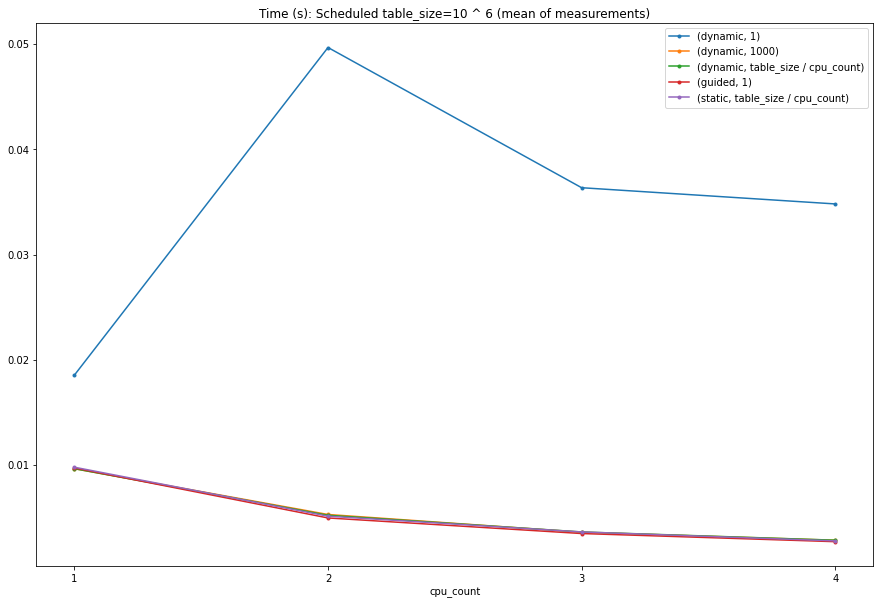

In [332]:
plot_dfall(d6, title='table_size=10 ^ 6')

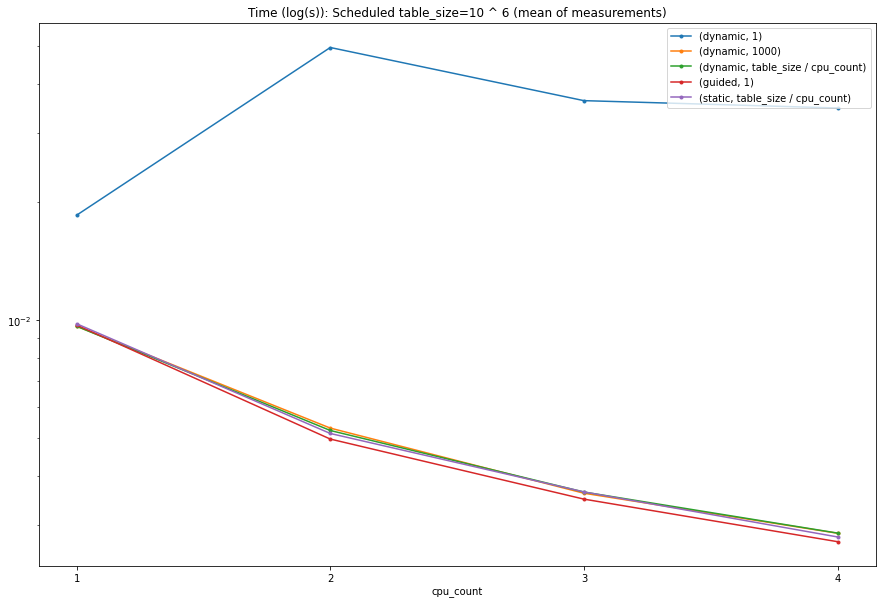

In [333]:
plot_dfall(d6, log=True, title='table_size=10 ^ 6')

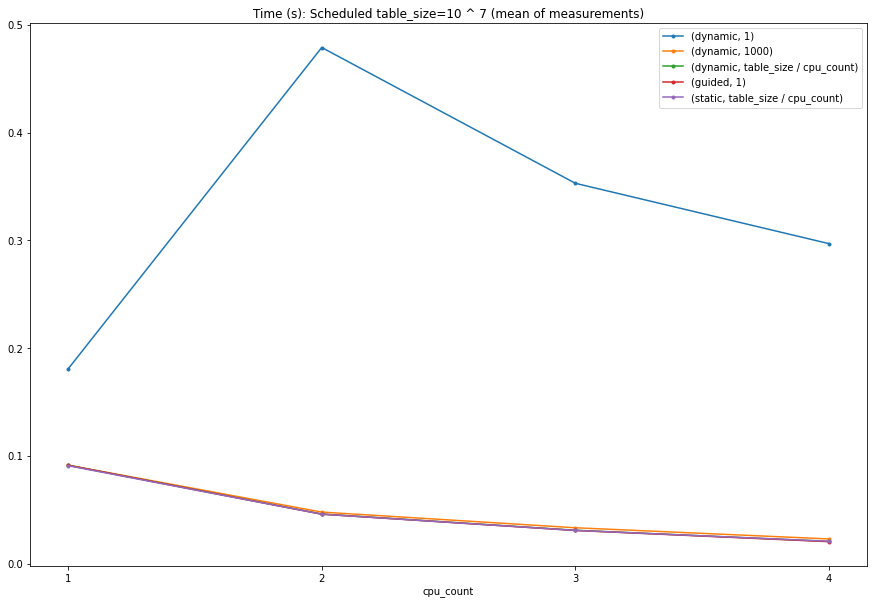

In [334]:
plot_dfall(d7, title='table_size=10 ^ 7')

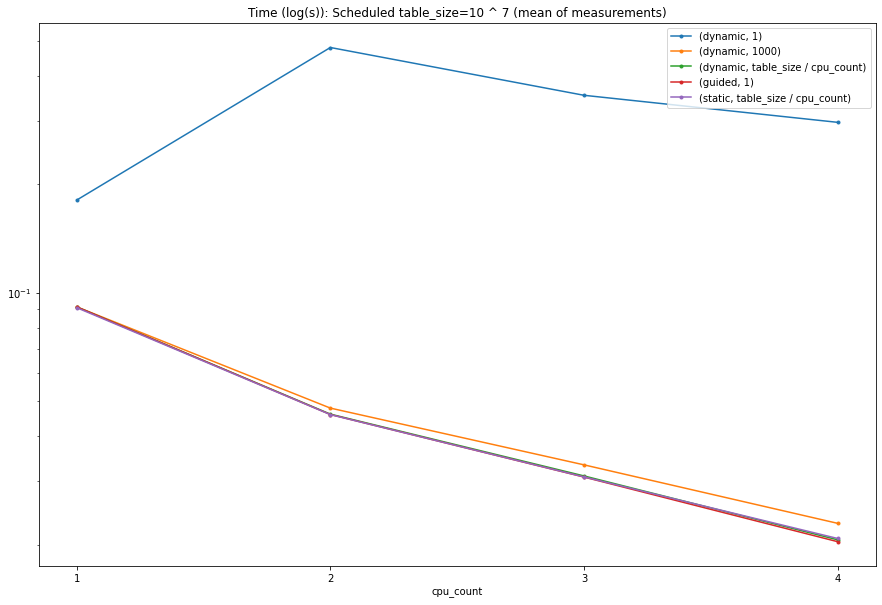

In [335]:
plot_dfall(d7, log=True, title='table_size=10 ^ 7')

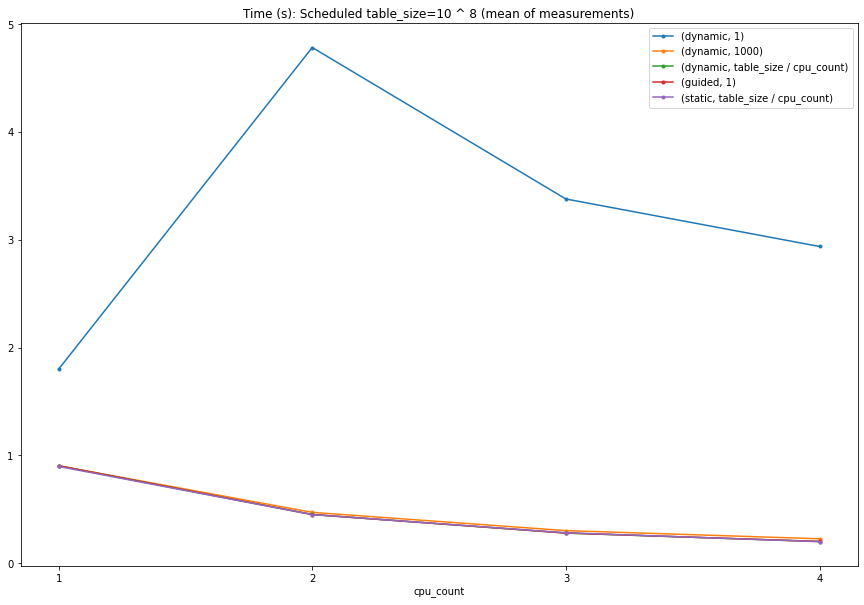

In [336]:
plot_dfall(d8, title='table_size=10 ^ 8')

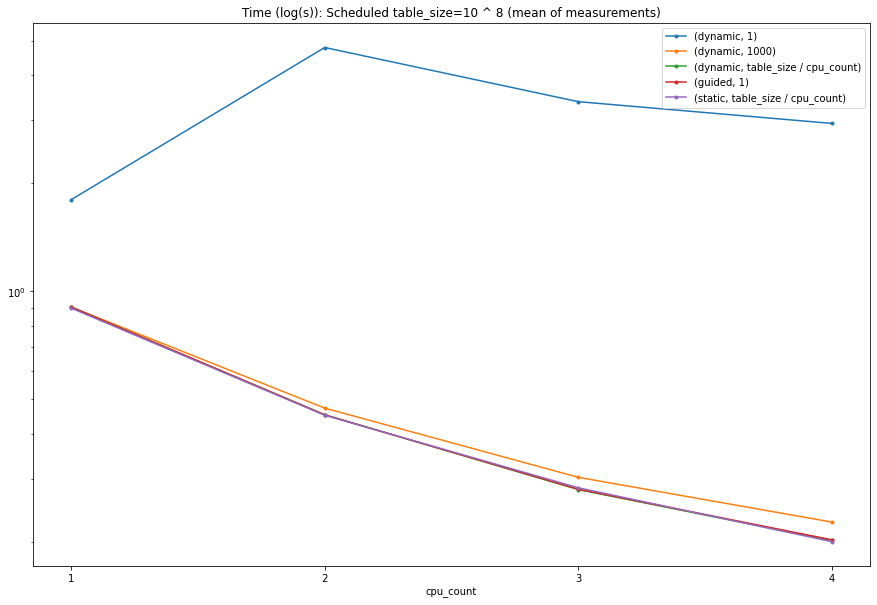

In [337]:
plot_dfall(d8, log=True, title='table_size=10 ^ 8')

# Speedup


In [377]:
def plot_spd(df, color=False, log=False, title=''):
    b = df.reset_index() \
    .groupby(['type', 'chunk_size', 'cpu_count']).mean().reset_index() \
    .pivot(index='cpu_count', values='time', columns=['type', 'chunk_size']) 
    
    b = b.apply(lambda x: 1/x).mul(b.iloc[(0)])

    unit = 'log' if log else ''
    plot_type = 'from mean of measurements'
    
    b.plot(logy=log,figsize=(15,10), 
           title=f"Speedup {unit}: Scheduled {title}{' ' if title else ''}({plot_type})", 
           style='.-', xticks=range(1,5),
          color=[color_dict.get(x[0], '#333333') for x in b.columns] if color else None
          )\
    .legend(loc='upper right')
    return b

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.373348  1.819314               1.844915  1.954589   
3           0.510161  2.667633               2.648555  2.781699   
4           0.532743  3.374956               3.370955  3.571990   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.905328  
3                        2.685568  
4                        3.499554

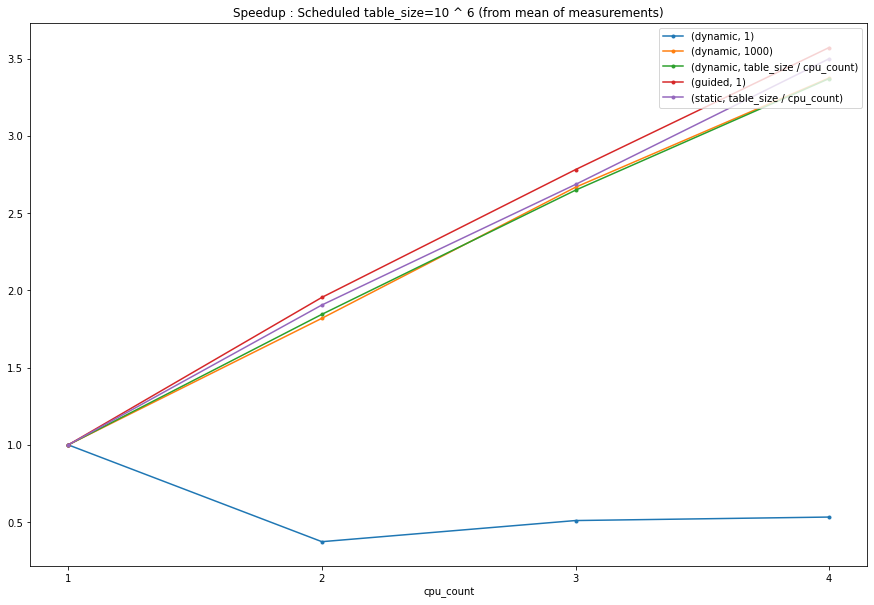

In [378]:
plot_spd(d6, title='table_size=10 ^ 6')

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.373348  1.819314               1.844915  1.954589   
3           0.510161  2.667633               2.648555  2.781699   
4           0.532743  3.374956               3.370955  3.571990   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.905328  
3                        2.685568  
4                        3.499554

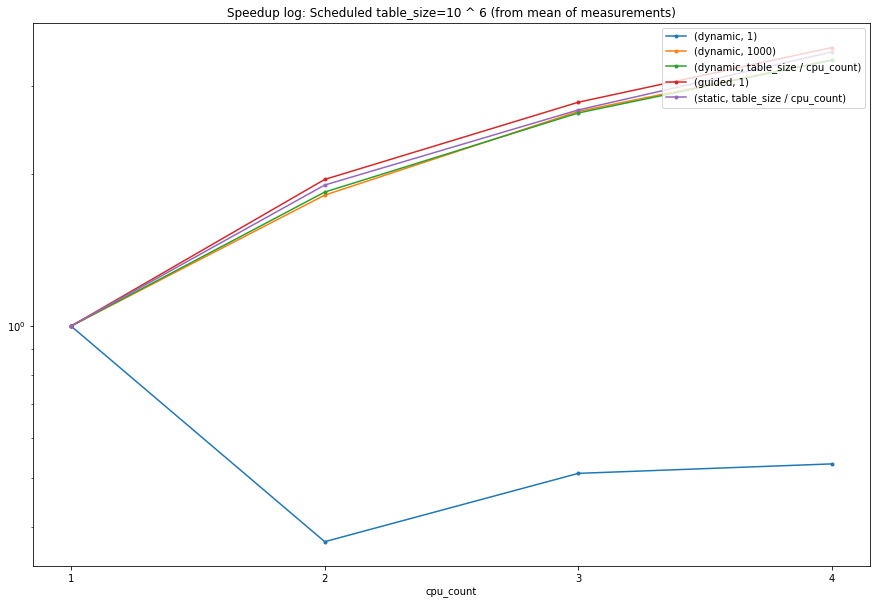

In [379]:
plot_spd(d6, log=True, title='table_size=10 ^ 6')

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.377320  1.909358               1.984064  1.988649   
3           0.512043  2.743754               2.944364  2.965666   
4           0.608599  3.986518               4.428436  4.481294   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.979929  
3                        2.947968  
4                        4.368047

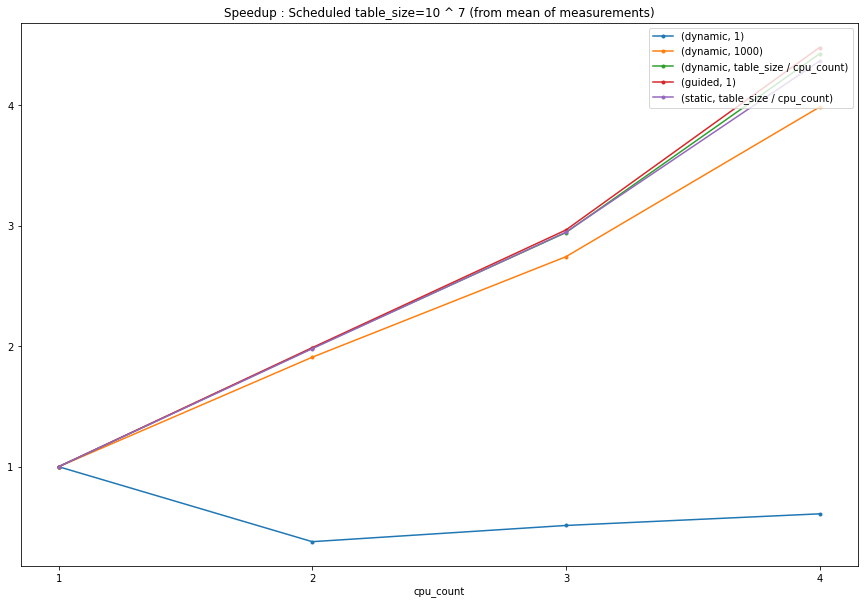

In [380]:
plot_spd(d7, title='table_size=10 ^ 7')

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.377320  1.909358               1.984064  1.988649   
3           0.512043  2.743754               2.944364  2.965666   
4           0.608599  3.986518               4.428436  4.481294   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.979929  
3                        2.947968  
4                        4.368047

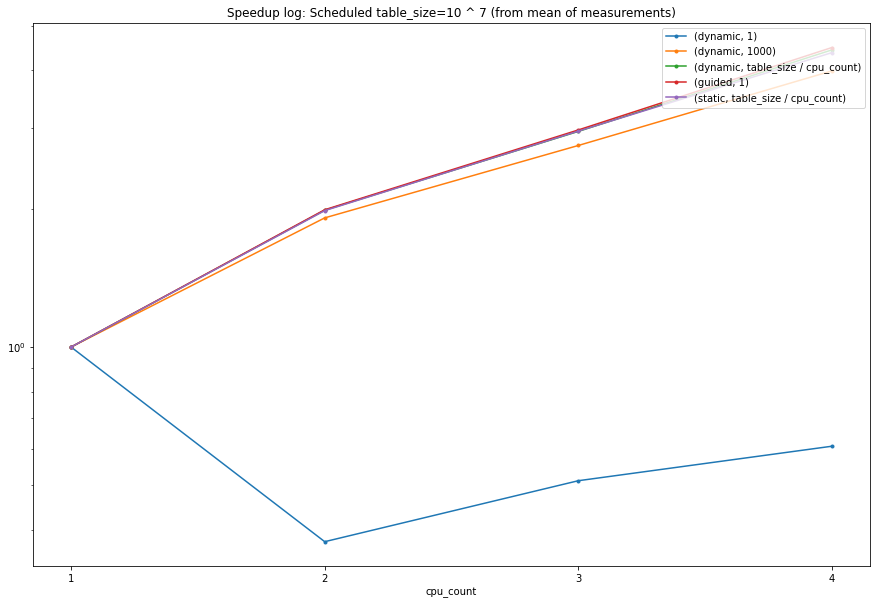

In [381]:
plot_spd(d7, log=True, title='table_size=10 ^ 7')

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.376398  1.913224               1.996743  1.998479   
3           0.532910  2.983405               3.228865  3.220881   
4           0.612791  3.976727               4.473887  4.456946   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.989229  
3                        3.168796  
4                        4.478330

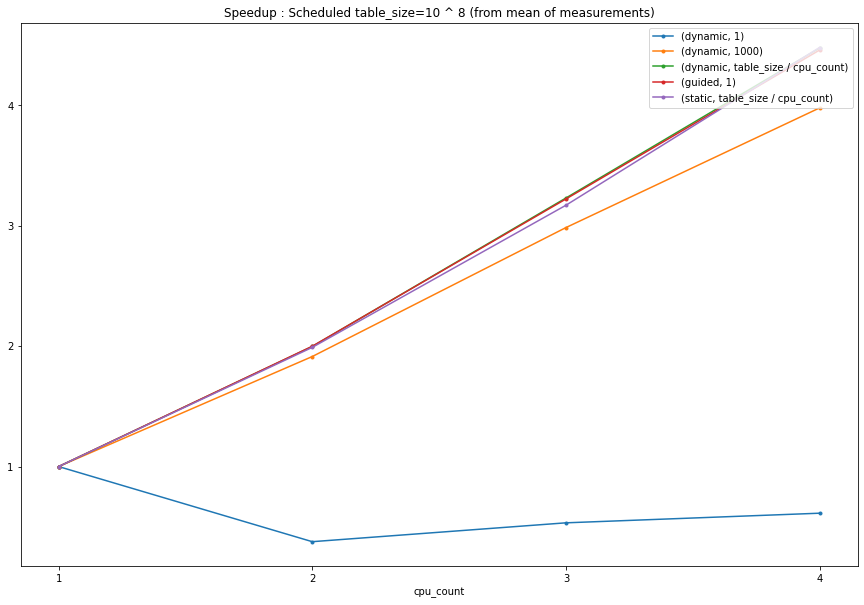

In [382]:
plot_spd(d8, title='table_size=10 ^ 8')

type         dynamic                                     guided  \
chunk_size         1      1000 table_size / cpu_count         1   
cpu_count                                                         
1           1.000000  1.000000               1.000000  1.000000   
2           0.376398  1.913224               1.996743  1.998479   
3           0.532910  2.983405               3.228865  3.220881   
4           0.612791  3.976727               4.473887  4.456946   

type                       static  
chunk_size table_size / cpu_count  
cpu_count                          
1                        1.000000  
2                        1.989229  
3                        3.168796  
4                        4.478330

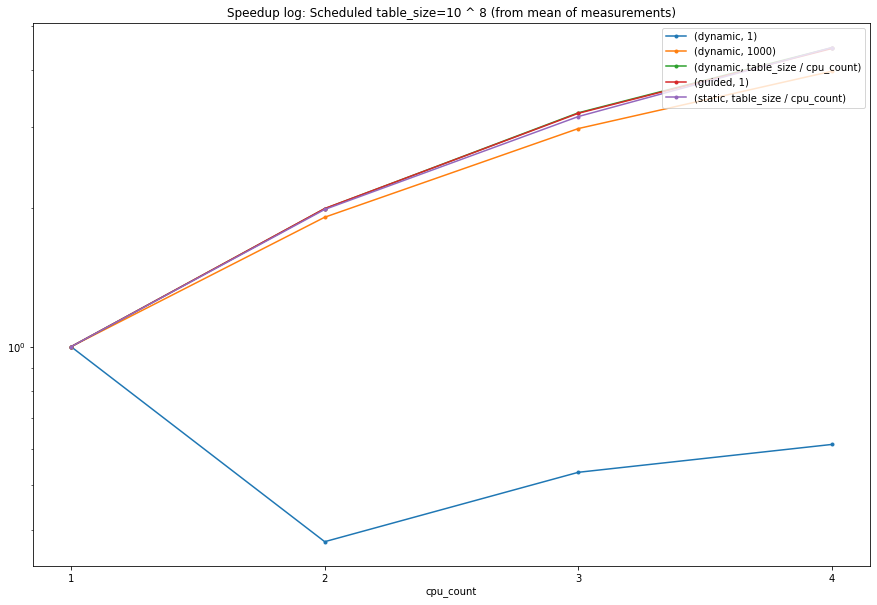

In [383]:
plot_spd(d8, log=True, title='table_size=10 ^ 8')

In [386]:
i = ['type', 'chunk_size', 'cpu_count']

In [387]:
d6 = d6.sort_values(i)
d6

,type,chunk_size,cpu_count,time
1,dynamic,1,1,0.019312
6,dynamic,1,1,0.018496
11,dynamic,1,1,0.018689
16,dynamic,1,1,0.018482
21,dynamic,1,1,0.018382
...,...,...,...,...
175,static,table_size / cpu_count,4,0.002798
180,static,table_size / cpu_count,4,0.002985
185,static,table_size / cpu_count,4,0.002789
190,static,table_size / cpu_count,4,0.002774


In [388]:
d7 = d7.sort_values(i)
d7

,type,chunk_size,cpu_count,time
201,dynamic,1,1,0.180981
206,dynamic,1,1,0.179948
211,dynamic,1,1,0.180757
216,dynamic,1,1,0.180965
221,dynamic,1,1,0.180734
...,...,...,...,...
375,static,table_size / cpu_count,4,0.020303
380,static,table_size / cpu_count,4,0.020283
385,static,table_size / cpu_count,4,0.020843
390,static,table_size / cpu_count,4,0.020535


In [393]:
d8 = d8.sort_values(i)
d8

,type,chunk_size,cpu_count,time
401,dynamic,1,1,1.801262
406,dynamic,1,1,1.798368
411,dynamic,1,1,1.799144
416,dynamic,1,1,1.803941
421,dynamic,1,1,1.801129
...,...,...,...,...
575,static,table_size / cpu_count,4,0.200759
580,static,table_size / cpu_count,4,0.198140
585,static,table_size / cpu_count,4,0.199925
590,static,table_size / cpu_count,4,0.198017


In [450]:
def plot_all(df, color=False, log=False, title=''):
    b = set_case_id(df).reset_index() \
    .groupby(['type', 'chunk_size', 'cpu_count', 'case_id']).mean().reset_index() \
    .pivot(index='cpu_count', values='time', columns=['type', 'chunk_size', 'case_id']) 
    
#     b = b.apply(lambda x: 1/x).mul(b.iloc[(0)])

    unit = 'log' if log else ''
    plot_type = 'all measurements'
    
    b.plot(logy=log,figsize=(15,10), 
           title=f"Speedup {unit}: Scheduled {title}{' ' if title else ''}({plot_type})", 
           style='.-', xticks=range(1,5),
          color=[color_dict.get(x[0], '#333333') for x in b.columns] if color else None
          )\
    .legend(loc='upper right')
    return b

type         dynamic                                                    \
chunk_size         1                                                     
case_id           1         2         3         4         5         6    
cpu_count                                                                
1           0.667185  0.667450  0.666748  0.665604  0.666686  0.666305   
2           1.709002  1.685968  1.661166  1.769746  1.812943  1.707900   
3           1.333588  1.174192  1.328363  1.388184  1.225506  1.175391   
4           1.061290  1.033127  1.127662  1.032414  1.100794  1.113367   

type                                                ...  \
chunk_size                                          ...   
case_id           7         8         9         10  ...   
cpu_count                                           ...   
1           0.666197  0.666684  0.665813  0.667796  ...   
2           1.844636  1.848937  1.836251  1.832113  ...   
3           1.333653  1.174341  1.138517  1.289080  ...   
4           1.123009  1.033852  1.111321  1.163948  ...   

type                                                                       \
chunk_size table_size / cpu_count                                           
case_id                        1         2         3         4         5    
cpu_count                                                                   
1                        0.335133  0.335379  0.335649  0.335283  0.334462   
2                        0.168170  0.168073  0.168462  0.168096  0.167927   
3                        0.100062  0.112479  0.113030  0.099891  0.099737   
4                        0.074525  0.074682  0.081084  0.074924  0.074352   

type                                                          
chunk_size                                                    
case_id           6         7         8         9         10  
cpu_count                                                     
1           0.335149  0.335473  0.335160  0.334936  0.335097  
2           0.167914  0.167846  0.168342  0.168161  0.167904  
3           0.112473  0.099839  0.099831  0.112410  0.099593  
4           0.074353  0.074315  0.075705  0.073910  0.074377  

[4 rows x 30 columns]

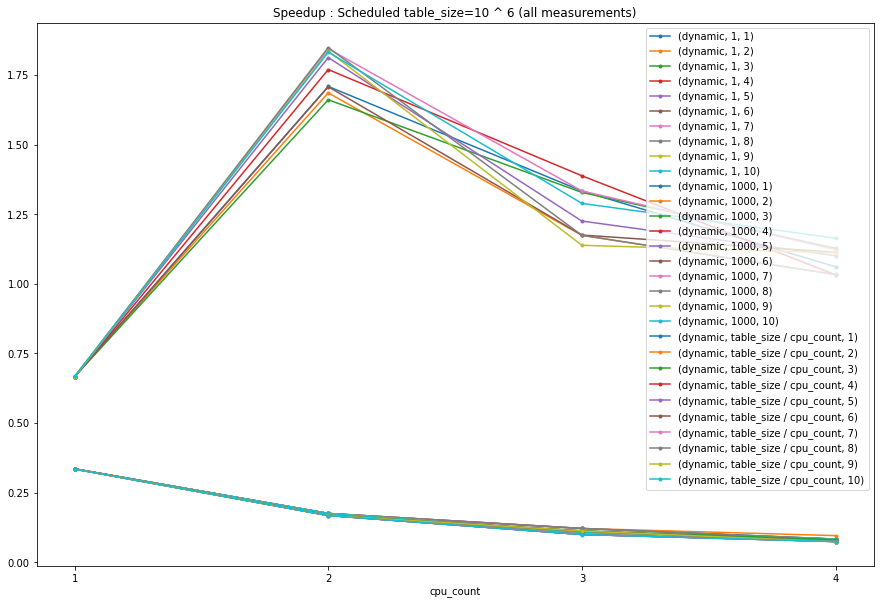

In [451]:
plot_all(d6, title='table_size=10 ^ 6')

type         dynamic                                                    \
chunk_size         1                                                     
case_id           1         2         3         4         5         6    
cpu_count                                                                
1           0.667185  0.667450  0.666748  0.665604  0.666686  0.666305   
2           1.709002  1.685968  1.661166  1.769746  1.812943  1.707900   
3           1.333588  1.174192  1.328363  1.388184  1.225506  1.175391   
4           1.061290  1.033127  1.127662  1.032414  1.100794  1.113367   

type                                                ...  \
chunk_size                                          ...   
case_id           7         8         9         10  ...   
cpu_count                                           ...   
1           0.666197  0.666684  0.665813  0.667796  ...   
2           1.844636  1.848937  1.836251  1.832113  ...   
3           1.333653  1.174341  1.138517  1.289080  ...   
4           1.123009  1.033852  1.111321  1.163948  ...   

type                                                                       \
chunk_size table_size / cpu_count                                           
case_id                        1         2         3         4         5    
cpu_count                                                                   
1                        0.335133  0.335379  0.335649  0.335283  0.334462   
2                        0.168170  0.168073  0.168462  0.168096  0.167927   
3                        0.100062  0.112479  0.113030  0.099891  0.099737   
4                        0.074525  0.074682  0.081084  0.074924  0.074352   

type                                                          
chunk_size                                                    
case_id           6         7         8         9         10  
cpu_count                                                     
1           0.335149  0.335473  0.335160  0.334936  0.335097  
2           0.167914  0.167846  0.168342  0.168161  0.167904  
3           0.112473  0.099839  0.099831  0.112410  0.099593  
4           0.074353  0.074315  0.075705  0.073910  0.074377  

[4 rows x 30 columns]

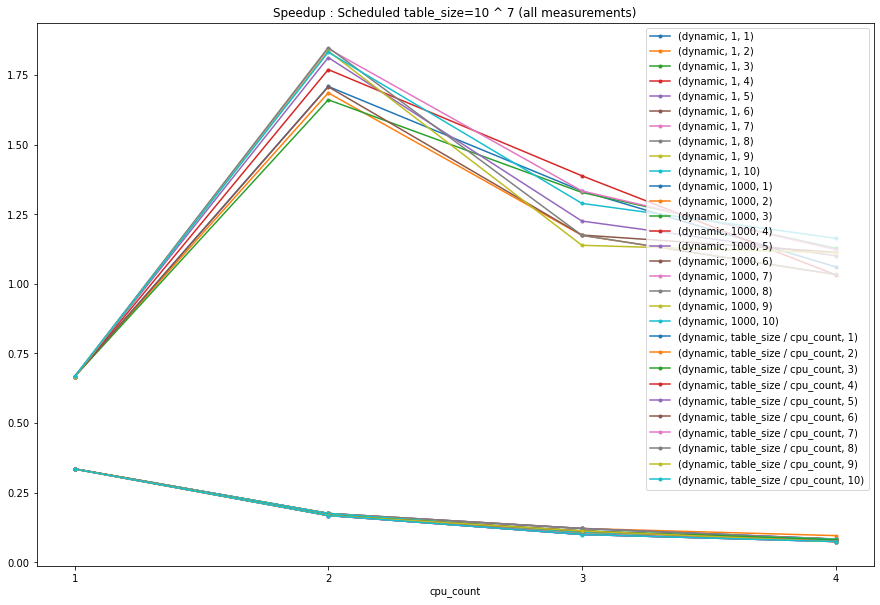

In [452]:
plot_all(d7, title='table_size=10 ^ 7')

type         dynamic                                                    \
chunk_size         1                                                     
case_id           1         2         3         4         5         6    
cpu_count                                                                
1           0.667185  0.667450  0.666748  0.665604  0.666686  0.666305   
2           1.709002  1.685968  1.661166  1.769746  1.812943  1.707900   
3           1.333588  1.174192  1.328363  1.388184  1.225506  1.175391   
4           1.061290  1.033127  1.127662  1.032414  1.100794  1.113367   

type                                                ...  \
chunk_size                                          ...   
case_id           7         8         9         10  ...   
cpu_count                                           ...   
1           0.666197  0.666684  0.665813  0.667796  ...   
2           1.844636  1.848937  1.836251  1.832113  ...   
3           1.333653  1.174341  1.138517  1.289080  ...   
4           1.123009  1.033852  1.111321  1.163948  ...   

type                                                                       \
chunk_size table_size / cpu_count                                           
case_id                        1         2         3         4         5    
cpu_count                                                                   
1                        0.335133  0.335379  0.335649  0.335283  0.334462   
2                        0.168170  0.168073  0.168462  0.168096  0.167927   
3                        0.100062  0.112479  0.113030  0.099891  0.099737   
4                        0.074525  0.074682  0.081084  0.074924  0.074352   

type                                                          
chunk_size                                                    
case_id           6         7         8         9         10  
cpu_count                                                     
1           0.335149  0.335473  0.335160  0.334936  0.335097  
2           0.167914  0.167846  0.168342  0.168161  0.167904  
3           0.112473  0.099839  0.099831  0.112410  0.099593  
4           0.074353  0.074315  0.075705  0.073910  0.074377  

[4 rows x 30 columns]

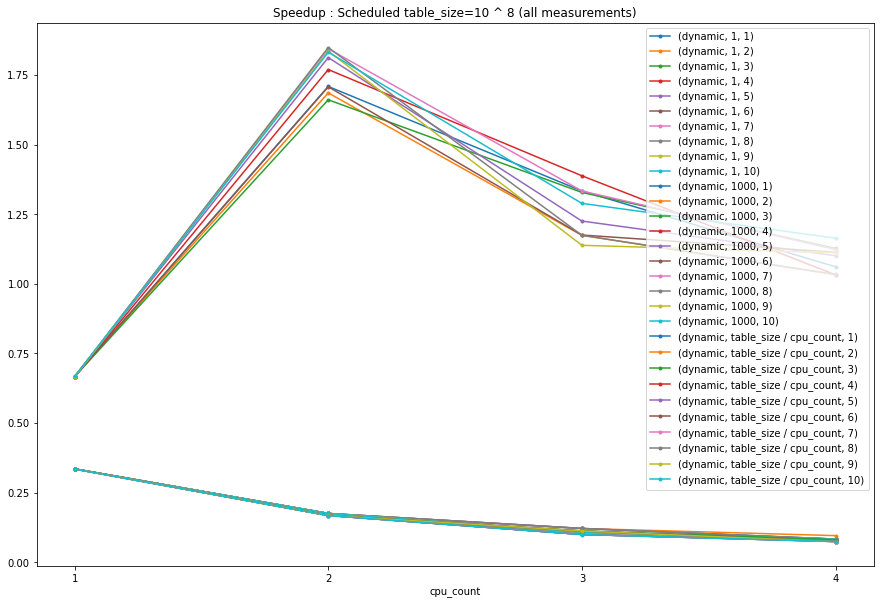

In [453]:
plot_all(d8, title='table_size=10 ^ 8')

In [5]:
df = pd.read_csv('./results.csv')

In [8]:
df = overwrite_variable_chunk(df)
df = df.groupby(['type','chunk_size', 'table_size', 'cpu_count']).mean()
df

time
type    chunk_size             table_size cpu_count          
dynamic 1                      1000000    1          0.018542
                                          2          0.049664
                                          3          0.036345
                                          4          0.034805
                               10000000   1          0.180750
                                          2          0.479038
                                          3          0.352999
                                          4          0.296994
                               100000000  1          1.800648
                                          2          4.783896
                                          3          3.378900
                                          4          2.938436
        1000                   1000000    1          0.009657
                                          2          0.005308
                                          3          0.003620
                                          4          0.002861
                               10000000   1          0.091367
                                          2          0.047852
                                          3          0.033300
                                          4          0.022919
                               100000000  1          0.904378
                                          2          0.472698
                                          3          0.303136
                                          4          0.227418
        table_size / cpu_count 1000000    1          0.009656
                                          2          0.005234
                                          3          0.003646
                                          4          0.002864
                               10000000   1          0.091349
                                          2          0.046041
                                          3          0.031025
                                          4          0.020628
                               100000000  1          0.904511
                                          2          0.452993
                                          3          0.280133
                                          4          0.202176
guided  1                      1000000    1          0.009728
                                          2          0.004977
                                          3          0.003497
                                          4          0.002723
                               10000000   1          0.091344
                                          2          0.045933
                                          3          0.030800
                                          4          0.020383
                               100000000  1          0.904639
                                          2          0.452664
                                          3          0.280867
                                          4          0.202973
static  table_size / cpu_count 1000000    1          0.009799
                                          2          0.005143
                                          3          0.003649
                                          4          0.002800
                               10000000   1          0.090883
                                          2          0.045902
                                          3          0.030829
                                          4          0.020806
                               100000000  1          0.898122
                                          2          0.451493
                                          3          0.283427
                                          4          0.200549